<img src="https://pad.gwdg.de/uploads/08e0f09e-ed2d-463f-8f92-e7ea3c661d18.png" width="40%">

# **Societal Challenges Datathon - Lecture 1**
#### 16 October 2024
<br>
Ann-Kathrin Edrich (edrich@mbd.rwth-aachen.de)<br>
Anna Simson (simson@mbd.rwth-aachen.de)<br>
Nazanin Bagherinejad (bagherinejad@mbd.rwth-aachen.de)<br>
<br>

In [1]:
import pandas as pd
import os
import numpy as np

## **1. Datasets**

Throughout this semester, we will be using the latest **National Health and Nutrition Examination Survey (NHANES)** dataset, which spans from **August 2021 to August 2023**. NHANES is a critical resource for understanding the health and nutritional status of the U.S. population. It is widely used for **public health research**, **policy-making**, and understanding trends in **chronic diseases**, **nutritional habits**, and **socioeconomic health disparities**.

You can find the complete dataset [here.]( https://wwwn.cdc.gov/Nchs/Nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023)

In [2]:
path = 'D:\\Downloads\\raw_datasets'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print(files)

['acculturation.XPT', 'alcohol_use.XPT', 'audiometry.XPT', 'blood_pressure_cholesterol.XPT', 'current_health_status.XPT', 'dermatology.XPT', 'diabetes.XPT', 'diet_behavior_nutrition.XPT', 'early_childhood.XPT', 'functioning.XPT', 'health_insurance.XPT', 'hepatitis.XPT', 'hospital_utilization_access_to_care.XPT', 'housing_characteristics.XPT', 'immunization.XPT', 'income.XPT', 'kidney_condition_urology.XPT', 'medical_conditions.XPT', 'mental_health_depression_screener.XPT', 'occupation.XPT', 'oral_health.XPT', 'pesticide_use.XPT', 'physical_activity.XPT', 'physical_activity_youth.XPT', 'prescription_medications.XPT', 'preventive_aspirin_use.XPT', 'sleep_disorders.XPT', 'smoking_cigarette_use.XPT', 'smoking_household_smokers.XPT', 'smoking_recent_tobacco_use.XPT', 'weight_history.XPT']


- Acculturation
- Alcohol use
- Audiometry
- Blood pressure & Cholesterol
- Current Health Status
- Dermatology
- Diabetes
- Diet Behavior & Nutrition
- Early Childhood
- Functioning
- Health Insurance
- Hepatitis
- Hospital Utilization & Access to Care
- Housing Characteristics
- Immunization
- Income
- Kidney Conditions - Urology
- Medical Conditions
- Mental Health - Depression Screener
- Occupation
- Oral Health
- Pesticide Use
- Physical Activity
- Physical Activity - Youth
- Prescription Medications
- Preventive Aspirine Use
- Sleep Disorders
- Smoking - Cigarette Use
- Smoking - Household Smokers
- Smoking - Recent Tobacco Use
- Weight History

In [3]:
# Import exemplary dataset
path = "D:\\Downloads\\raw_datasets\\"
df = pd.read_sas(path + 'diabetes.XPT', format='xport')

print(sum(df[:50]['DIQ010']))

98.0


[More information on the variable names and values for "Audiometry.XPT"](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/AUQ_L.htm])

In [4]:
# Import variables
with open("D:\\Downloads\\variables.csv", mode='r', encoding='utf-8', errors='replace') as f:
    df_vars = pd.read_csv(f)

print(df_vars.head())
df_vars1 = df_vars.copy()
df_vars2 = df_vars.copy()
df_vars3 = df_vars.copy()
df_vars4 = df_vars.copy()

  Variable Name                               Variable Description  \
0        AUQ054  These next questions are about {your/SP's} hea...   
1        AUQ101  How often {do you/does SP} have difficulty hea...   
2        AUQ144  A hearing test by a specialist is one that is ...   
3       AUQ410A  What are the main causes of {your/SP's} hearin...   
4       AUQ410B  What are the main causes of {your/SP's} hearin...   

                       Renamed_variables Data File Name Data File Description  \
0                    HearingStatus_NoAid          AUQ_L            Audiometry   
1  DifficultyHearing_WithBackgroundNoise          AUQ_L            Audiometry   
2             LastHearingTest_Specialist          AUQ_L            Audiometry   
3                  reason_hearing_loss_A          AUQ_L            Audiometry   
4                  reason_hearing_loss_B          AUQ_L            Audiometry   

   Begin Year  EndYear      Component Use Constraints Unnamed: 9  
0        2021     2023  Q

In [5]:
diabetes = pd.read_sas(path + 'diabetes.XPT', format='xport')

relevant_rows = df_vars[(df_vars['Variable Name'].isin(diabetes.columns)) & (df_vars['Data File Name'] == 'DIQ_L')]

# Loop through the filtered rows and replace column names
df_dia = diabetes.rename(columns=dict(zip(relevant_rows['Variable Name'], relevant_rows['Renamed_variables'])))

In [6]:
df_dia.head()

,sequence_no,EverTold_Diabetes
0,130378.0,2.0
1,130379.0,2.0
2,130380.0,1.0
3,130381.0,2.0
4,130382.0,2.0


## **2. Basics of Pandas**

In [7]:
df_smoke = pd.read_sas(path + 'alcohol_use.XPT', format='xport')

df_smoke.head()

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,ALQ170
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,1.0,2.000000e+00,3.0,5.397605e-79,NaN,NaN,2.0,NaN
2,130380.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,2.0,NaN
3,130386.0,1.0,4.000000e+00,2.0,1.000000e+01,5.397605e-79,10.0,2.0,5.397605e-79
4,130387.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN


In [8]:
smoke = pd.read_sas(path + 'smoking_cigarette_use.XPT', format='xport')
smoke.head()

,SEQN,SMQ020,SMQ040,SMD641,SMD650,SMD100MN,SMQ621,SMD630,SMAQUEX2
0,130378.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
1,130379.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,130380.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
df_bp = pd.read_sas(path + 'blood_pressure_cholesterol.XPT', format='xport')
gh = pd.read_sas(path + 'kidney_condition_urology.XPT', format='xport')
diet_df = pd.read_sas(path + 'diet_behavior_nutrition.XPT', format='xport')
# df_bp['TotalCigarettesSmoked']

### **2.1 Selecting columns and rows**

In [10]:
# # Select a single column
# df_smoke['SEQN']

# # Select multiple columns
# df_smoke[['SEQN', 'SMQ020']]

# # Select a row by index
# df_smoke.loc[1]

# # Filter rows
# df_smoke[df_smoke['SMQ020'] > 3]


aspirin = pd.read_sas(path + 'preventive_aspirin_use.XPT', format='xport')

df_vars[(df_vars['Variable Name'].isin(df_smoke.columns)) & (df_vars['Data File Name'] == 'ALQ_L')]
df_vars1[(df_vars1['Variable Name'].isin(smoke.columns)) & (df_vars1['Data File Name'] == 'SMQ_L')]
df_vars2[(df_vars2['Variable Name'].isin(df_bp.columns)) & (df_vars2['Data File Name'] == 'BPQ_L')]
df_vars3[(df_vars3['Variable Name'].isin(aspirin.columns)) & (df_vars3['Data File Name'] == 'RXQASA_L')]



,Variable Name,Variable Description,Renamed_variables,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints,Unnamed: 9
19,RXQ510,Doctors and other health care providers someti...,EverTold_TakeAspirin,RXQASA_L,Preventive Aspirin Use,2021,2023,Questionnaire,NaN,NaN
20,RXQ515,{Are you/Is SP} now following this advice?,Following_AspirinAdvice,RXQASA_L,Preventive Aspirin Use,2021,2023,Questionnaire,NaN,NaN
21,RXQ520,"On {your/SP's} own, {are you/is SP} now taking...",TakingAspirinOnOwn,RXQASA_L,Preventive Aspirin Use,2021,2023,Questionnaire,NaN,NaN
22,SEQN,Respondent sequence number.,sequence_no,RXQASA_L,Preventive Aspirin Use,2021,2023,Questionnaire,NaN,NaN


In [11]:
relevant_rows = df_vars[(df_vars['Variable Name'].isin(df_smoke.columns)) & (df_vars['Data File Name'] == 'ALQ_L')]
relevant_rows1 = df_vars1[(df_vars1['Variable Name'].isin(smoke.columns)) & (df_vars1['Data File Name'] == 'SMQ_L')]
relevant_rows2 = df_vars2[(df_vars2['Variable Name'].isin(df_bp.columns)) & (df_vars2['Data File Name'] == 'BPQ_L')]
relevant_rows3 = df_vars3[(df_vars3['Variable Name'].isin(aspirin.columns)) & (df_vars3['Data File Name'] == 'RXQASA_L')]
relevant_rows4 = df_vars4[(df_vars4['Variable Name'].isin(diet_df.columns)) & (df_vars4['Data File Name'] == 'DBQ_L')]
# Loop through the filtered rows and replace column names
df_smoke = df_smoke.rename(columns=dict(zip(relevant_rows['Variable Name'], relevant_rows['Renamed_variables'])))
smoke = smoke.rename(columns=dict(zip(relevant_rows1['Variable Name'], relevant_rows1['Renamed_variables'])))
df_bp = df_bp.rename(columns=dict(zip(relevant_rows2['Variable Name'], relevant_rows2['Renamed_variables'])))
aspirin = aspirin.rename(columns=dict(zip(relevant_rows3['Variable Name'], relevant_rows3['Renamed_variables'])))
diet_df = diet_df.rename(columns=dict(zip(relevant_rows4['Variable Name'], relevant_rows4['Renamed_variables'])))

# df_smoke['TotalCigarettesSmoked']
aspirin.isna().sum()
# df_bp.head()
df_bp.head()
print(len(df_bp))
df_bp.isna().sum()

8501


sequence_no                                   0
EverTold_Hypertension                         3
ConfirmedHypertension_Visits               5533
CurrentlyTaking_BloodPressureMedication    5532
EverTold_HighCholesterol                      3
CurrentlyTaking_CholesterolMedication         3
dtype: int64

### **2.2 Group By**

### **2.3 Merging Dataframes**

- Inner join
- Outer join
- Left join
- Right join

### **2.4 Saving the dataframe**

In [36]:
import pandas as pd

def process_xpt_files(file_info, df_vars):
    """
    Processes a list of SAS XPT files, renames their columns based on provided metadata,
    and merges all DataFrames on the 'sequence_no' column.

    Args:
        file_info (list of tuple): List of tuples where each tuple contains the file path (str) 
                                  and corresponding data file name (str).
        df_vars (pd.DataFrame): Metadata DataFrame containing column renaming information.

    Returns:
        pd.DataFrame: A merged DataFrame containing all processed DataFrames.
    """
    processed_dfs = []

    for file_path, data_file_name in file_info:
        # Load the XPT file into a DataFrame
        df = pd.read_sas(file_path, format='xport')

        # Filter the metadata to find relevant rows
        relevant_rows = df_vars[(df_vars['Variable Name'].isin(df.columns)) & (df_vars['Data File Name'] == data_file_name)]

        # Rename columns based on the metadata
        rename_dict = dict(zip(relevant_rows['Variable Name'], relevant_rows['Renamed_variables']))
        df = df.rename(columns=rename_dict)

        # Add the processed DataFrame to the list
        processed_dfs.append(df)

    # Merge all processed DataFrames on 'sequence_no'
    merged_df = processed_dfs[0]
    i = 0
    for df in processed_dfs[1:]:
        # df.rename(columns={df.columns[0]: 'sequence_no'}, inplace=True)
        # print(df.columns)
        i += 1
        if i == 7:
            print(df.columns) 
        merged_df = pd.merge(merged_df, df, on='sequence_no', how='inner')
        print(len(merged_df))

    return merged_df

# Example usage:
file_info = [(path + 'alcohol_use.XPT', 'ALQ_L'), (path + 'smoking_cigarette_use.XPT', 'SMQ_L'), (path + 'blood_pressure_cholesterol.XPT', 'BPQ_L'), (path + 'kidney_condition_urology.XPT', 'KIQ_U_L')]


# Process the files and merge them
merged_dataframe = process_xpt_files(file_info, df_vars)

len(merged_dataframe)

# Example usage:


6337
6337
6064


6064

In [13]:
df_vars['Data File Description']
df_file_desc = df_vars['Data File Description'].unique().tolist()
data_file = df_vars['Data File Name'].unique().tolist()
print(df_file_desc[data_file.index('AUQ_L')])
ind = {val : data_file.index(val) for val in data_file}
data_file.sort(key=lambda x: df_file_desc[ind[x]])

Audiometry


In [26]:
merged_dataframe['TotalCigarettesSmoked']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6059   NaN
6060   NaN
6061   NaN
6062   NaN
6063   NaN
Name: TotalCigarettesSmoked, Length: 6064, dtype: float64

## **3. Task suggestions** (without specific order)

- Familiarize yourself with the source of the datasets. Assess the general trustworthiness of the source.
- Consider which and how many datasets you want to combine that are meaningful for the prediction task
- Combine the datasets. Remember that all datasets contain different IDs!
- Replace column labels with human understandable variables.
- Get an overview of the available data. Perform a EDA and try to understand what the relationships actually mean. When in doubt, use common knowledge and scientific resources to assess whether contained data might be faulty.
- Which features have a correlation to diabetes occurrence?
- Set up a gitlab/github project to work with.
- For the moment do not worry about missing values, we will talk about that during our next meeting.

Make sure that you are equipped next madatory meeting to talk about your findings, prepare figures to show the results of the EDA and be ready to explain how and why you combined the datasets you chose.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import combinations


import pandas as pd

def preprocess_csv(df):
    """
    Efficient preprocessing to remove duplicates and impute NaN values using hot deck imputation.
    Shows progress for grouping and imputation.
    """
    # Remove duplicates
    df = df.drop_duplicates()
    print("Step 1: Duplicates removed.")

    # Identify columns with missing values
    nan_columns = df.columns[df.isna().any()]
    match_cols_by_column = {col: [c for c in df.columns if c != col] for col in nan_columns}

    # Ensure match columns do not contain NaNs (fallback to empty string)
    df[match_cols_by_column.keys()] = df[match_cols_by_column.keys()].fillna('MISSING')

    # Convert match columns to string to avoid type mismatch
    for col, match_cols in match_cols_by_column.items():
        df[match_cols] = df[match_cols].astype(str)

    # Create lookup tables for each column
    lookup_tables = {}
    for col in nan_columns:
        print(f"Creating lookup table for column {col}...")
        complete_rows = df.dropna(subset=[col])  # Get rows where `col` is not NaN
        lookup_tables[col] = complete_rows.groupby(match_cols_by_column[col])[col].first()

    print("Step 2: Lookup tables created.")

    # Function to impute missing values
    def impute_row(row, col):
        match_cols = match_cols_by_column[col]
        key = tuple(row[c] for c in match_cols)

        # Lookup exact match
        if key in lookup_tables[col]:
            return lookup_tables[col].loc[key]
        
        # If no match, try the most frequent value in the column
        most_frequent = df[col].mode()
        return most_frequent[0] if not most_frequent.empty else row[col]  # Keep NaN if no data available

    # Apply imputation
    for i, col in enumerate(nan_columns):
        print(f"Imputing missing values in column {col}... [{i+1}/{len(nan_columns)}]")
        df[col] = df[col].combine_first(df.apply(lambda row: impute_row(row, col), axis=1))

    # Check if NaNs remain
    remaining_nans = df.isna().sum().sum()
    if remaining_nans > 0:
        print(f"Warning: {remaining_nans} NaN values still remain.")

    print("Step 3: Missing values imputed.")
    return df



def standardize_data(df):
    """
    Standardize the DataFrame (zero mean, unit variance).
    """
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled

def normalize_data(df):
    """
    Normalize the DataFrame (min-max scaling).
    """
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled

# Step 2: Extract Diabetic and Non-Diabetic Patients
def get_diabetes_status(diabetes_df):
    """
    Extract diabetic and non-diabetic patient sequence numbers from the diabetes DataFrame.
    """
    # Filter patients based on diabetes status
    diabetic_patients = diabetes_df[diabetes_df['DIQ010'] == 1]['SEQN'].tolist()
    non_diabetic_patients = diabetes_df[diabetes_df['DIQ010'] == 2]['SEQN'].tolist()
    
    return diabetic_patients, non_diabetic_patients

def split_by_diabetes_status(feature_df, diabetic_patients, non_diabetic_patients):
    """
    Split the feature DataFrame into diabetic and non-diabetic groups.
    """
    # Separate based on sequence_no
    diabetic_df = feature_df[feature_df['sequence_no'].isin(diabetic_patients)]
    non_diabetic_df = feature_df[feature_df['sequence_no'].isin(non_diabetic_patients)]
    
    return diabetic_df, non_diabetic_df


In [39]:
merged_dataframe.isna().sum()

sequence_no                                      0
EverHad_Alcohol                                  0
AlcoholConsumptionFrequency_12Months             0
AverageDrinksPerDrinkingDay_12Months             0
MoreThanSpecificNumberOfDrinksFrequency          0
HeavyDrinkingWithinTwoHoursFrequency_12Months    0
MoreThan8DrinksPerDay_12Months                   0
DailyHeavyDrinkingHistory                        0
OccasionsWithHeavyDrinking_30Days                0
SmokedAtLeast100CigarettesInLife                 0
CurrentCigaretteSmoking                          0
CigarettesSmokedDays_30Days                      0
CigarettesPerDayOnSmokingDays_30Days             0
SmokingTypeMenthol                               0
QuestionnaireModeFlag                            0
EverTold_Hypertension                            0
ConfirmedHypertension_Visits                     0
CurrentlyTaking_BloodPressureMedication          0
EverTold_HighCholesterol                         0
CurrentlyTaking_CholesterolMedi

In [37]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

merged_dataframe = merged_dataframe.drop(columns= ['TotalCigarettesSmoked', 'FirstCigaretteAge']) #DO SOMETHING TO DELETE COLUMNS WITH ALL NAN VALUES

if 'merged_dataframe' in locals():
    
    df = merged_dataframe.copy()  # Make a copy to avoid modifying the original
    
    # Drop columns with more than 1300 NaN values
    # df = df.loc[:, df.isnull().sum() <= 2500]

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Mode Imputation (Most Frequent Value)
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # Alternative: KNN Imputation (if needed)
    # Convert categorical columns to numerical (One-Hot Encoding)
    df_encoded = pd.get_dummies(df, drop_first=True)

    knn_imputer = KNNImputer(n_neighbors=5)
    df_imputed = knn_imputer.fit_transform(df_encoded)

    # Convert back to DataFrame
    df = pd.DataFrame(df_imputed, columns=df_encoded.columns)

    # Update the original DataFrame
    merged_dataframe = df

    print("Missing values in categorical columns have been imputed.")
else:
    print("Error: merged_dataframe not found in the environment.")

Missing values in categorical columns have been imputed.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: General Overview
def overview(df):
    """
    Provides a quick overview of the DataFrame.
    """
    print("Shape of DataFrame:", df.shape)
    print("\nColumn Names:\n", df.columns.tolist())
    print("\nBasic Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n", df.head())
    print("\nStatistical Summary:\n", df.describe())
    print("\nNumber of Duplicates:", df.duplicated().sum())

# Step 2: Missing Values
def check_missing_values(df):
    """
    Checks for missing values in the DataFrame.
    """
    missing_values = df.isnull().sum()
    print("\nMissing Values:\n", missing_values[missing_values > 0])
    print("\nPercentage of Missing Values:\n", (missing_values[missing_values > 0] / len(df) * 100).round(2))

# Step 3: Distribution of Features
def plot_distributions(df, cols=None):
    """
    Plots the distribution of numeric features.
    """
    if cols is None:
        cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    df[cols].hist(figsize=(15, 10), bins=20)
    plt.suptitle("Feature Distributions")
    plt.show()

# Step 4: Correlation Matrix
def plot_correlation_matrix(df):
    """
    Plots the correlation matrix.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

# Step 5: Class Balance
def check_class_balance(df, label_column):
    """
    Checks the balance of classes in the dataset.
    """
    class_counts = df[label_column].value_counts()
    print("\nClass Distribution:\n", class_counts)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title(f"Class Balance of {label_column}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Step 6: Boxplot for Outliers
def plot_boxplots(df, cols=None):
    """
    Plots boxplots to check for outliers.
    """
    if cols is None:
        cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    df[cols].plot(kind='box', subplots=True, layout=(len(cols)//3 + 1, 3), figsize=(15, 10), sharex=False, sharey=False)
    plt.suptitle("Boxplots for Outlier Detection")
    plt.show()

def remove_null_columns(df):
    """Remove columns where all entries are NaN."""
    return df.dropna(axis=1, how='all')

In [19]:
def preprocess(df):
    """
    Remove duplicates and impute NaN values using hot deck.
    """
    df.drop_duplicates(inplace=True)
    
    def impute(col):
        valid = col.dropna()
        return col.apply(lambda x: x if pd.notna(x) else valid.sample(1).values[0] if not valid.empty else x)
    
    for col in df.columns:
        df[col] = impute(df[col])
    
    return df

# smoke = preprocess(smoke)
# dia_sm, nonDia_sm = split_by_diabetes_status(smoke, dia, non_dia)

In [40]:
new_data = preprocess(merged_dataframe)
new_data.isna().sum()

sequence_no                                      0
EverHad_Alcohol                                  0
AlcoholConsumptionFrequency_12Months             0
AverageDrinksPerDrinkingDay_12Months             0
MoreThanSpecificNumberOfDrinksFrequency          0
HeavyDrinkingWithinTwoHoursFrequency_12Months    0
MoreThan8DrinksPerDay_12Months                   0
DailyHeavyDrinkingHistory                        0
OccasionsWithHeavyDrinking_30Days                0
SmokedAtLeast100CigarettesInLife                 0
CurrentCigaretteSmoking                          0
CigarettesSmokedDays_30Days                      0
CigarettesPerDayOnSmokingDays_30Days             0
SmokingTypeMenthol                               0
QuestionnaireModeFlag                            0
EverTold_Hypertension                            0
ConfirmedHypertension_Visits                     0
CurrentlyTaking_BloodPressureMedication          0
EverTold_HighCholesterol                         0
CurrentlyTaking_CholesterolMedi

In [21]:
from sklearn.decomposition import PCA
def perform_pca(df, n_components=2):
    """
    Perform PCA on the given DataFrame.
    
    Parameters:
    - df: Input DataFrame with features.
    - n_components: Number of principal components to retain.
    
    Returns:
    - Transformed DataFrame with principal components.
    """
    # Drop non-numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Standardizing the data
    df_std = (df_numeric - df_numeric.mean()) / (df_numeric.std() + 1e-10)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df_std)
    
    # Create DataFrame for principal components
    pca_df = pd.DataFrame(
        principal_components, 
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Plot explained variance
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title("Explained Variance by Components")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained")
    plt.grid(True)
    plt.show()
    
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    return pca_df

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def perform_lda(df, target_column, n_components=2):
    """
    Perform LDA on the given DataFrame.
    
    Parameters:
    - df: Input DataFrame with features and target.
    - target_column: The name of the target column.
    - n_components: Number of linear discriminants to retain.
    
    Returns:
    - Transformed DataFrame with linear discriminants.
    """
    # Separate features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Drop non-numeric columns from features
    X_numeric = X.select_dtypes(include=[np.number])
    
    # Standardizing the data
    X_std = (X_numeric - X_numeric.mean()) / X_numeric.std()
    
    # Perform LDA
    lda = LDA(n_components=n_components)
    lda_components = lda.fit_transform(X_std, y)
    
    # Create DataFrame for LDA components
    lda_df = pd.DataFrame(
        lda_components, 
        columns=[f'LD{i+1}' for i in range(n_components)]
    )
    lda_df[target_column] = y.reset_index(drop=True)
    
    # Plot the LDA components
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_column, palette='Set1')
    plt.title("LDA: Linear Discriminants")
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return lda_df


In [22]:
def add_diabetes_status(df_feature, df_diabetes, target_column='DIQ010'):
    """
    Merge the diabetes status into the feature DataFrame based on SEQN.
    
    Parameters:
    df_feature (pd.DataFrame): DataFrame containing features with 'SEQN'.
    df_diabetes (pd.DataFrame): DataFrame containing diabetes status with 'SEQN'.
    target_column (str): Column in df_diabetes that represents the diabetes status.
    
    Returns:
    pd.DataFrame: The feature DataFrame with an added column for diabetes status.
    """
    # Ensure that 'SEQN' column is present in both DataFrames
    print(df_diabetes.columns)
    if 'sequence_no' not in df_feature.columns or 'sequence_no' not in df_diabetes.columns:
        raise ValueError("Both DataFrames must have a 'sequence_no' column.")
    
    # Merge the DataFrames on 'sequence_no' to get the diabetes status
    merged_df = df_feature.merge(df_diabetes[['sequence_no', target_column]], on='sequence_no', how='left')
    
    # Return the updated DataFrame
    return merged_df

In [46]:
df_dia[['sequence_no', 'DIQ010']]

KeyError: "['DIQ010'] not in index"

In [43]:
train_df = add_diabetes_status(smoke, df_dia, 'EverTold_Diabetes')
print(len(train_df))
train_df.dropna(inplace=True)
# print(train_df.isna().sum())
print(train_df['EverTold_Diabetes'].unique())

new_data = add_diabetes_status(merged_dataframe, df_dia, 'EverTold_Diabetes')
train_data = add_diabetes_status(merged_dataframe, df_dia, 'EverTold_Diabetes')


Index(['sequence_no', 'EverTold_Diabetes'], dtype='object')
9015
[]
Index(['sequence_no', 'EverTold_Diabetes'], dtype='object')
Index(['sequence_no', 'EverTold_Diabetes'], dtype='object')


In [184]:
merged_dataframe.head()

,sequence_no,EverHad_Alcohol,AlcoholConsumptionFrequency_12Months,AverageDrinksPerDrinkingDay_12Months,MoreThanSpecificNumberOfDrinksFrequency,DailyHeavyDrinkingHistory,SmokedAtLeast100CigarettesInLife,QuestionnaireModeFlag,EverTold_Hypertension,EverTold_HighCholesterol,CurrentlyTaking_CholesterolMedication,EverTold_KidneyFailure,UrineLeakageFrequency,LeakageWithActivity_12Months,LeakageWithUrgency_12Months,NightUrinationFrequency_30Days
0,130378.0,1.0,3.600000e+00,1.8,6.000000e+00,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.2,1.8,1.8,1.8
1,130379.0,1.0,2.000000e+00,3.0,5.397605e-79,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
2,130380.0,1.0,1.000000e+01,1.0,5.397605e-79,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,130386.0,1.0,4.000000e+00,2.0,1.000000e+01,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
4,130387.0,1.0,5.397605e-79,2.0,5.200000e+00,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0


In [77]:
# print(new_data.isna().sum())
len(new_data)
new_data['EverTold_Diabetes'].value_counts().to_dict()

{2.0: 4975, 1.0: 868, 3.0: 221}

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# # Load DataFrame
# data = new_data.copy()
data = train_data.copy()
# Fill missing values
# data = data.dropna()

valid_values = [1.0, 2.0]

assump = data[data['EverTold_Diabetes'].isin([3.0])]
data = data[data['EverTold_Diabetes'].isin(valid_values)]

data['EverTold_Diabetes'] = data['EverTold_Diabetes'].map({1.0: 0, 2.0: 1})
assump['EverTold_Diabetes'] = assump['EverTold_Diabetes'].map({3.0: 0})

# Separate features and target
X = data.drop(columns=['EverTold_Diabetes'])
y = data['EverTold_Diabetes']

y_assump = assump['EverTold_Diabetes']
x_assump = assump.drop(columns=['EverTold_Diabetes'])

In [187]:
print(data['EverTold_Diabetes'].isna().sum())
data = data.dropna(subset=['EverTold_Diabetes'])
print(data['EverTold_Diabetes'].unique())

print(data['EverTold_Diabetes'].isna().sum())


0
[1 0]
0


In [49]:
y.isna().sum()

0

In [48]:
from sklearn.preprocessing import StandardScaler
# X = pd.concat([X, x_assump], ignore_index=True)
# y = pd.concat([y, y_assump], ignore_index=True)
# X = perform_pca(X, n_components=5)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [189]:
X_train

array([[ 0.59383866, -0.2674032 ,  0.02047219, ..., -1.40541587,
         0.73387463, -0.42626217],
       [ 1.71648255, -0.2674032 ,  0.02047219, ...,  0.67955644,
         0.73387463,  2.83080727],
       [-1.20905501,  0.29533546, -0.20587202, ...,  0.26256198,
         0.31865492,  0.06229825],
       ...,
       [-1.36579058, -0.2674032 , -0.20587202, ...,  0.67955644,
         0.73387463, -0.2634087 ],
       [-1.23252189, -0.2674032 , -1.39417911, ...,  0.67955644,
         0.73387463, -0.42626217],
       [ 1.66810022, -0.2674032 ,  0.86926297, ...,  0.67955644,
         0.73387463, -1.24052953]])

In [147]:
len(X_train)+len(X_test)

5843

In [160]:
print(y_train.value_counts())
print(y_test.value_counts())
print(len(data.columns))

EverTold_Diabetes
1    3980
0     694
Name: count, dtype: int64
EverTold_Diabetes
1    995
0    174
Name: count, dtype: int64
14


In [114]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a simple RandomForest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
top_features = np.argsort(importances)[-24:]  # Select top 10 features

# Select only the top features
X_train_selected = X_train[:, top_features]
X_test_selected = X_test[:, top_features]


In [ ]:

# Initialize CatBoost model
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=100)

# Fit the model on the resampled data
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)


0:	learn: 0.5306649	total: 6.33ms	remaining: 3.16s
100:	learn: 0.1503689	total: 637ms	remaining: 2.52s
200:	learn: 0.1193868	total: 1.09s	remaining: 1.62s
300:	learn: 0.0961298	total: 1.54s	remaining: 1.02s
400:	learn: 0.0791318	total: 2.06s	remaining: 509ms
499:	learn: 0.0656522	total: 2.56s	remaining: 0us
Accuracy: 0.165098374679213
ROC AUC: 0.24168543868769132
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.82      0.23       174
           1       0.61      0.05      0.09       995

    accuracy                           0.17      1169
   macro avg       0.37      0.43      0.16      1169
weighted avg       0.54      0.17      0.11      1169



In [216]:
#NO OVERSAMPLING
# Define models


models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# class_weights = dict(pd.Series(y_train).value_counts(normalize=True))
# models["Logistic Regression"] = LogisticRegression(class_weight=class_weights)
# models["Random Forest"] = RandomForestClassifier(class_weight=class_weights)
# models["XGBoost"] = XGBClassifier(scale_pos_weight=class_weights[0] / class_weights[1])


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Performance metrics
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": report
    }

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"ROC AUC: {result['ROC AUC']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.716852010265184
ROC AUC: 0.7802171778432392
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.71      0.43       174
           1       0.93      0.72      0.81       995

    accuracy                           0.72      1169
   macro avg       0.62      0.71      0.62      1169
weighted avg       0.84      0.72      0.75      1169

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.7810094097519247
ROC AUC: 0.5820886039392363
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.30      0.29       174
           1       0.88      0.87      0.87       995

    accuracy                           0.78      1169
   macro avg       0.58      0.58      0.58      1169
weighted avg       0.79      0.78      0.78      1169

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8622

c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [16:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [211]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

best_random_state = None
max_accuracy = 0
best_results = {}

# Iterate over multiple random states
for _ in range(200):  # Number of different random states to test
    random_state = np.random.randint(0, 1000)  # Generate a random state
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Performance metrics
        accuracy = model.score(X_test, y_test)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        
        # Store the best accuracy and its corresponding random state
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = random_state
            best_results = {
                "Model": name,
                "Accuracy": accuracy,
                "ROC AUC": roc_auc,
                "Classification Report": classification_report(y_test, y_pred)
            }

# Print the best results
print(f"Best Random State: {best_random_state}")
print(f"Best Model: {best_results['Model']}")
print(f"Max Accuracy: {best_results['Accuracy']}")
print(f"ROC AUC: {best_results['ROC AUC']}")
print("Classification Report:")
print(best_results['Classification Report'])


c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\U

Best Random State: 428
Best Model: Random Forest
Max Accuracy: 0.8682634730538922
ROC AUC: 0.7932565124472939
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.25      0.36       174
           1       0.88      0.98      0.93       995

    accuracy                           0.87      1169
   macro avg       0.77      0.61      0.64      1169
weighted avg       0.85      0.87      0.84      1169



c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(n_estimators=100))
]
meta_model = LogisticRegression()

stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacked_model.fit(X_train, y_train)

y_pred = stacked_model.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))

import optuna
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5)
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best Parameters:", study.best_params)


Stacking Accuracy: 0.8502994011976048


c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-10 13:32:31,529] A new study created in memory with name: no-name-058dcf87-e599-4db4-9ece-e253fdd6424f
[I 2025-02-10 13:32:32,203] Trial 0 finished with value: 0.823781009409752 and parameters: {'n_estimators': 479, 'max_depth': 5, 'learning_rate': 0.13546727298921035, 'subsample': 0.6875655825505151, 'colsample_bytree': 0.8413226661806475, 'gamma': 0.41728614177614476}. Best is trial 0 with value: 0.823781009409752.
[I 2025-02-10 13:32:32,405] Trial 1 finished with value: 0.844311377245509 and parameters: {'n_estimators': 145, 'max_depth': 7, 'learning_rate': 0.05102716447272864, 'subsample': 0.7440202497197245, 'colsample_bytree': 0.9320759260801318, 'gamma': 2.7261350335949883}. Best is trial 1 with value: 0.8443113

Best Parameters: {'n_estimators': 379, 'max_depth': 15, 'learning_rate': 0.11249834536764464, 'subsample': 0.9062881975393852, 'colsample_bytree': 0.9073122648774213, 'gamma': 3.0342147766467225}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', random_state=42)
search.fit(X_train, y_train)

# Best model
best_xgb = search.best_estimator_


c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\U

In [43]:
from sklearn.metrics import accuracy_score

#  Predict on test set
y_pred = best_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.8494


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_log_reg = grid_lr.best_estimator_
print("Best Logistic Regression Params:", grid_lr.best_params_)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Params:", grid_xgb.best_params_)



Best Logistic Regression Params: {'C': 100}
Best Random Forest Params: {'max_depth': 10, 'n_estimators': 300}
Best XGBoost Params: {'learning_rate': 0.01, 'n_estimators': 100}


In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.pipeline import Pipeline



# Define individual models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
svm = SVC(probability=True, random_state=42)

# Create Voting Classifier (Soft Voting for probability-based decisions)
voting_clf = VotingClassifier(estimators=[
    ('log_reg', best_log_reg),
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('nn', model)
], voting='soft')

# Train ensemble model
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = voting_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Accuracy: {accuracy:.4f}")


NameError: name 'SVC' is not defined

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba = best_xgb.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Choose threshold where precision & recall are balanced
optimal_idx = np.argmax(precisions[:-1] - recalls[:-1])  # Ensure index is within bounds
optimal_threshold = 0.56
y_pred_adjusted = (y_proba > optimal_threshold).astype(int)

# Compute accuracy
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy with Adjusted Threshold: {accuracy_adjusted:.4f}")



Accuracy with Adjusted Threshold: 0.8546


In [ ]:
#SMOTE
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Performance metrics
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": report
    }

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"ROC AUC: {result['ROC AUC']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.6873290793072014
ROC AUC: 0.6570381712785738
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.58      0.41       205
           1       0.88      0.71      0.79       892

    accuracy                           0.69      1097
   macro avg       0.60      0.64      0.60      1097
weighted avg       0.77      0.69      0.72      1097

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.5870556061987238
ROC AUC: 0.5150224215246637
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.40      0.27       205
           1       0.82      0.63      0.71       892

    accuracy                           0.59      1097
   macro avg       0.51      0.52      0.49      1097
weighted avg       0.70      0.59      0.63      1097

--------------------------------------------------
Model: Random Forest
Accuracy: 0.585

c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                              use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Performance metrics
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred, zero_division=0)
    
    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": report
    }

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"ROC AUC: {result['ROC AUC']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.7356715141146278
ROC AUC: 0.7635765032056836
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.63      0.41       174
           1       0.92      0.75      0.83       995

    accuracy                           0.74      1169
   macro avg       0.61      0.69      0.62      1169
weighted avg       0.83      0.74      0.77      1169

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.7904191616766467
ROC AUC: 0.5876162421301911
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       174
           1       0.88      0.88      0.88       995

    accuracy                           0.79      1169
   macro avg       0.59      0.59      0.59      1169
weighted avg       0.79      0.79      0.79      1169

--------------------------------------------------
Model: Random Forest
Accuracy: 0.850

c:\Users\ashmi\anaconda3\envs\obj_det\lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(train_df['EverTold_Diabetes'].unique())

[2. 1. 3. 9.]


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

data = new_data.copy()
data['EverTold_Diabetes'] = data['EverTold_Diabetes'].map({1.0: 0, 2.0: 1})
data = data.dropna(subset=['EverTold_Diabetes'])  # Ensure no remaining NaNs

X = data.drop(columns=['EverTold_Diabetes']).values
y = data['EverTold_Diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Neural Network
class DiabetesClassifier(nn.Module):
    def __init__(self, input_size):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model, Loss, and Optimizer
input_size = X_train.shape[1]
model = DiabetesClassifier(input_size)

# Compute class weights
class_counts = np.bincount(y_train.astype(int))

class_weights = torch.tensor([len(y_train) / (2.0 * count) for count in class_counts], dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Evaluating the model
model.eval()
y_true = []
y_pred = []
y_proba = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())
        y_proba.extend(probabilities[:, 1].numpy())

# Metrics
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
roc_auc = roc_auc_score(y_true, y_proba)
report = classification_report(y_true, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

Epoch [1/100], Loss: 343.5361
Epoch [2/100], Loss: 110.9474
Epoch [3/100], Loss: 54.5494
Epoch [4/100], Loss: 36.8568
Epoch [5/100], Loss: 28.0224
Epoch [6/100], Loss: 31.2514
Epoch [7/100], Loss: 19.7022
Epoch [8/100], Loss: 19.8113
Epoch [9/100], Loss: 13.1017
Epoch [10/100], Loss: 10.3136
Epoch [11/100], Loss: 11.5167
Epoch [12/100], Loss: 8.2967
Epoch [13/100], Loss: 7.2179
Epoch [14/100], Loss: 7.0233
Epoch [15/100], Loss: 5.9643
Epoch [16/100], Loss: 4.5910
Epoch [17/100], Loss: 2.8764
Epoch [18/100], Loss: 3.6041
Epoch [19/100], Loss: 2.6387
Epoch [20/100], Loss: 2.1550
Epoch [21/100], Loss: 2.8111
Epoch [22/100], Loss: 1.6262
Epoch [23/100], Loss: 1.4480
Epoch [24/100], Loss: 1.5623
Epoch [25/100], Loss: 1.2222
Epoch [26/100], Loss: 1.4661
Epoch [27/100], Loss: 1.0873
Epoch [28/100], Loss: 0.9903
Epoch [29/100], Loss: 0.8827
Epoch [30/100], Loss: 0.9189
Epoch [31/100], Loss: 0.8468
Epoch [32/100], Loss: 0.8660
Epoch [33/100], Loss: 0.8036
Epoch [34/100], Loss: 0.8132
Epoch [35/

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Load & Process Data
data = new_data.copy()
data['EverTold_Diabetes'] = data['EverTold_Diabetes'].map({1.0: 0, 2.0: 1})
data = data.dropna(subset=['EverTold_Diabetes'])

X = data.drop(columns=['EverTold_Diabetes']).values
y = data['EverTold_Diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Custom Dataset for Pairwise Training
class SiameseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.num_samples = len(y)
    
    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        anchor = self.X[idx]
        anchor_label = self.y[idx]

        # Pick a random positive or negative pair
        if np.random.rand() > 0.5:
            # Positive pair (same class)
            indices = np.where(self.y == anchor_label)[0]
        else:
            # Negative pair (different class)
            indices = np.where(self.y != anchor_label)[0]

        pair_idx = np.random.choice(indices)
        pair_sample = self.X[pair_idx]
        pair_label = self.y[pair_idx]

        label = torch.tensor(1.0 if anchor_label == pair_label else 0.0, dtype=torch.float32)

        return torch.tensor(anchor, dtype=torch.float32), torch.tensor(pair_sample, dtype=torch.float32), label

# DataLoaders
train_dataset = SiameseDataset(X_train, y_train)
test_dataset = SiameseDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Siamese Network
class SiameseNetwork(nn.Module):
    def __init__(self, input_size):
        super(SiameseNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Feature representation
        return x

# Contrastive Loss Function
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        distance = torch.norm(output1 - output2, p=2, dim=1)  # Euclidean distance
        loss = (label * distance**2) + ((1 - label) * torch.clamp(self.margin - distance, min=0.0)**2)
        return loss.mean()

# Initialize Model, Loss, Optimizer
input_size = X_train.shape[1]
model = SiameseNetwork(input_size)
criterion = ContrastiveLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    for X1, X2, y in train_loader:
        optimizer.zero_grad()
        output1 = model(X1)
        output2 = model(X2)
        loss = criterion(output1, output2, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X1, X2, y in test_loader:
        output1 = model(X1)
        output2 = model(X2)
        distances = torch.norm(output1 - output2, p=2, dim=1)
        predictions = (distances < 0.5).float()  # Threshold for similarity
        y_true.extend(y.numpy())
        y_pred.extend(predictions.numpy())

# Compute Metrics
roc_auc = roc_auc_score(y_true, y_pred)
report = classification_report(y_true, y_pred, zero_division=0)

print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)


Epoch [1/50], Loss: 17949.2695
Epoch [2/50], Loss: 108.3953
Epoch [3/50], Loss: 57.2348
Epoch [4/50], Loss: 51.8030
Epoch [5/50], Loss: 36.7176
Epoch [6/50], Loss: 30.3356
Epoch [7/50], Loss: 21.4127
Epoch [8/50], Loss: 20.7353
Epoch [9/50], Loss: 17.0857
Epoch [10/50], Loss: 16.0080
Epoch [11/50], Loss: 12.2218
Epoch [12/50], Loss: 8.9852
Epoch [13/50], Loss: 7.5521
Epoch [14/50], Loss: 9.9560
Epoch [15/50], Loss: 5.7893
Epoch [16/50], Loss: 6.3775
Epoch [17/50], Loss: 4.4115
Epoch [18/50], Loss: 4.1624
Epoch [19/50], Loss: 3.4888
Epoch [20/50], Loss: 3.5841
Epoch [21/50], Loss: 3.0026
Epoch [22/50], Loss: 2.4596
Epoch [23/50], Loss: 2.4478
Epoch [24/50], Loss: 1.7943
Epoch [25/50], Loss: 2.0191
Epoch [26/50], Loss: 1.7856
Epoch [27/50], Loss: 1.5202
Epoch [28/50], Loss: 1.4676
Epoch [29/50], Loss: 1.3168
Epoch [30/50], Loss: 1.3481
Epoch [31/50], Loss: 1.1198
Epoch [32/50], Loss: 1.1153
Epoch [33/50], Loss: 0.9704
Epoch [34/50], Loss: 0.8652
Epoch [35/50], Loss: 0.8040
Epoch [36/50],

In [ ]:
import os
import pandas as pd

# Path to the folder containing CSV files
folder_path = 'D:\\Downloads\\raw_datasets'

least_imbalance_file = None
least_imbalance_value = float('inf')

# Iterate through the .XPT files
for file_name in os.listdir(folder_path):
    if file_name.endswith('.XPT'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load .XPT file
        data1 = pd.read_sas(file_path)
        # print(f"Processing file: {file_name}")
        
        # Check if SEQN exists in the .XPT file
        if 'SEQN' in data1.columns:
            # Merge the data on 'SEQN' and 'sequence_no' to get EverTold_Diabetes
            merged_data = data1.merge(df_dia[['sequence_no', 'EverTold_Diabetes']], 
                                      left_on='SEQN', right_on='sequence_no', how='left')
            
            # Drop rows with missing 'EverTold_Diabetes'
            merged_data = merged_data.dropna(subset=['EverTold_Diabetes'])
            
            # Filter for the classes 1.0 and 2.0 in 'EverTold_Diabetes'
            filtered_data = merged_data[merged_data['EverTold_Diabetes'].isin([1.0, 2.0])]
            
            # Compute the class counts
            class_counts = filtered_data['EverTold_Diabetes'].value_counts()

            # Ensure both classes 1.0 and 2.0 exist to calculate imbalance
            if 1.0 in class_counts.index and 2.0 in class_counts.index:
                class_1_count = class_counts[1.0]
                class_2_count = class_counts[2.0]
                total = class_1_count + class_2_count
                if file_name == 'preventive_aspirin_use.XPT':
                    print(f"{file_name} - Class 1: {class_1_count}, Class 2: {class_2_count}")
                
                # Calculate imbalance metric
                imbalance = abs(class_1_count / total - class_2_count / total)
                
                # Check for least imbalance
                if imbalance < least_imbalance_value:
                    least_imbalance_value = imbalance
                    least_imbalance_file = file_name

# Output the result
print(f"Dataset with the least class imbalance: {least_imbalance_file}")
print(f"Imbalance Metric (|p(1.0) - p(2.0)|): {least_imbalance_value}")

preventive_aspirin_use.XPT - Class 1: 1022, Class 2: 4459
Dataset with the least class imbalance: preventive_aspirin_use.XPT
Imbalance Metric (|p(1.0) - p(2.0)|): 0.6270753512132823


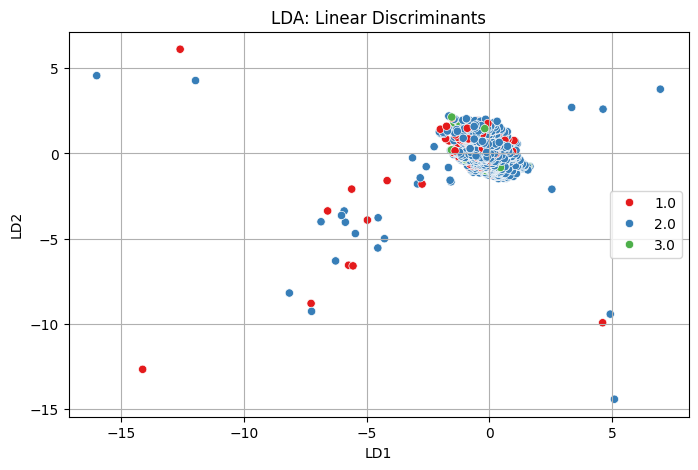

In [ ]:
vis_df = perform_lda(add_alc, 'EverTold_Diabetes')

In [ ]:
import pandas as pd
import numpy as np

def drop_Corr_feat(df, correlation_threshold=0.9):
    """
    Drop features with high correlation iteratively.
    Correlated features (above the correlation threshold) are dropped.
    """
    corr_matrix = df.corr().abs()  # Get absolute correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Upper triangle to avoid redundancy

    to_drop = set()
    for col in upper_triangle.columns:
        if col not in to_drop:  # Only process if the feature isn't already dropped
            high_corr_features = [index for index in upper_triangle.index if upper_triangle[col][index] > correlation_threshold]
            to_drop.update(high_corr_features)

    df.drop(columns=to_drop, inplace=True)
    
    return df


In [ ]:
df_alcohol1 = drop_Corr_feat(df_alcohol, correlation_threshold=0.3)
df_alcohol1.columns

Index(['sequence_no', 'EverHad_Alcohol',
       'AlcoholConsumptionFrequency_12Months',
       'AverageDrinksPerDrinkingDay_12Months',
       'MoreThan8DrinksPerDay_12Months', 'DailyHeavyDrinkingHistory',
       'OccasionsWithHeavyDrinking_30Days'],
      dtype='object')

In [ ]:
def select_topK_feat(df, top_k=5):
    """
    Select top K features with the highest variability (standard deviation).
    """
    feature_variability = df.std().sort_values(ascending=False)  # Calculate std and sort by descending order
    top_k_features = feature_variability.head(top_k).index  # Get top K features

    df = df[top_k_features]  # Select only top K features
    return df

In [ ]:
df_alcohol2 = select_topK_feat(df_alcohol, top_k=4)

print(df_alcohol2.columns)

Index(['sequence_no', 'AverageDrinksPerDrinkingDay_12Months',
       'OccasionsWithHeavyDrinking_30Days', 'MoreThan8DrinksPerDay_12Months'],
      dtype='object')


In [ ]:
df_alcohol2.head()

,sequence_no,AverageDrinksPerDrinkingDay_12Months,OccasionsWithHeavyDrinking_30Days,MoreThan8DrinksPerDay_12Months
0,130378.0,NaN,NaN,NaN
1,130379.0,3.0,NaN,NaN
2,130380.0,1.0,NaN,NaN
3,130386.0,2.0,5.397605e-79,10.0
4,130387.0,NaN,NaN,NaN


In [ ]:
from sklearn.decomposition import PCA

def select_feat_ev(df, num_features):
    """
    Select features based on highest eigenvalues from PCA.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        num_features (int): Number of top features to select.
        
    Returns:
        list: Names of selected features.
    """
    # Perform PCA
    pca = PCA()
    pca.fit(df)

    # Get absolute contributions of features to principal components
    feature_importance = np.abs(pca.components_).sum(axis=0)

    # Rank features by importance
    top_indices = np.argsort(feature_importance)[::-1][:num_features]

    # Map back to feature names
    selected_features = df.columns[top_indices].tolist()
    
    return selected_features


In [ ]:
def find_corr_with_df2(important_features, df1, df2):
    df1_filtered = df1[important_features]
    corr_results = {}
    for feature in important_features:
        corr_with_df2 = df2.corrwith(df1_filtered[feature])
        corr_results[feature] = corr_with_df2
    
    corr_df = pd.DataFrame(corr_results)
    highest_corr = corr_df.abs().idxmax(axis=0)
    highest_corr_values = corr_df.abs().max(axis=0)
    
    summary = pd.DataFrame({
        "first_feature": important_features,
        "second_feature_with_highest_corr": highest_corr.values,
        "highest_corr_value": highest_corr_values.values
    })
    
    return summary

result = find_corr_with_df2(top_features, df_alcohol, smoke)
print(result)

                                   first_feature  \
0        MoreThanSpecificNumberOfDrinksFrequency   
1  HeavyDrinkingWithinTwoHoursFrequency_12Months   
2                 MoreThan8DrinksPerDay_12Months   
3              OccasionsWithHeavyDrinking_30Days   
4           AverageDrinksPerDrinkingDay_12Months   
5           AlcoholConsumptionFrequency_12Months   

       second_feature_with_highest_corr  highest_corr_value  
0               CurrentCigaretteSmoking            0.023677  
1                 QuestionnaireModeFlag            0.012080  
2               CurrentCigaretteSmoking            0.011902  
3  CigarettesPerDayOnSmokingDays_30Days            0.032431  
4  CigarettesPerDayOnSmokingDays_30Days            0.026225  
5      SmokedAtLeast100CigarettesInLife            0.027202  


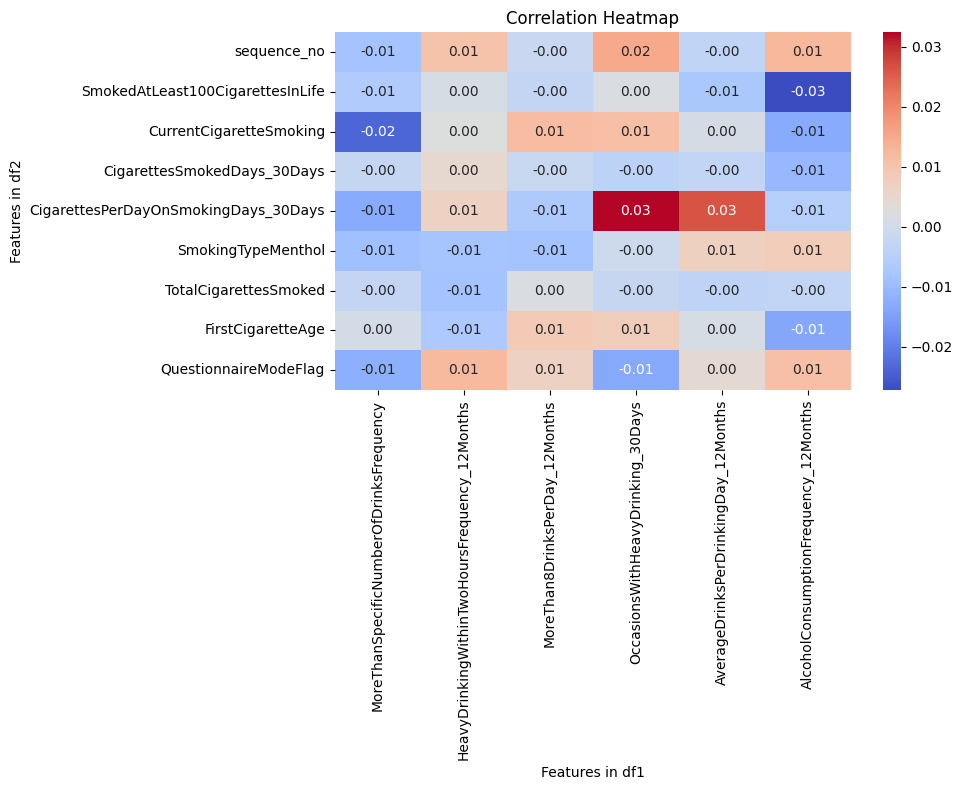

In [ ]:
def plot_corr_with_df2(important_features, df1, df2):
    df1_filtered = df1[important_features]
    corr_results = {}
    for feature in important_features:
        corr_with_df2 = df2.corrwith(df1_filtered[feature])
        corr_results[feature] = corr_with_df2
    
    corr_df = pd.DataFrame(corr_results)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap")
    plt.xlabel("Features in df1")
    plt.ylabel("Features in df2")
    plt.tight_layout()
    plt.show()

plot_corr_with_df2(top_features, df_alcohol, smoke)